# EDA with Pandas

## Data Cleaning

In [1]:
import numpy as np

In [2]:
import pandas as pd 

'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv'

'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv'

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [4]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


## Standard Missing Values

In [6]:
data['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non-Standard Missing Values

In [7]:
data['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [15]:
missing_values = ['--', 'na', 'n/a', 'none']

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)

In [17]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [18]:
data['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [19]:
data.index

RangeIndex(start=0, stop=9, step=1)

## Unexpected Missing Values

In [20]:
data['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [21]:
index = 0
for row in data['OWN_OCCUPIED']:
    try:
        print(int(row))
        data.loc[index, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    index += 1

12


In [22]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [23]:
index = 0
for row in data['NUM_BATH']:
    try:
        float(row)
    except ValueError:
        data.loc[index, 'NUM_BATH'] = np.nan
        pass
    index += 1

In [24]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Summarizing Missing Values

In [25]:
data.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [26]:
data.isna().sum().sum()

13

## Replacing

In [27]:
data['ST_NUM'].fillna(125)

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [28]:
data.loc[6, 'ST_NUM'] = 125

In [29]:
data['ST_NUM'].fillna(125, inplace=True)

In [30]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [31]:
data['NUM_BEDROOMS'].median()

3.0

In [32]:
data['NUM_BEDROOMS'].fillna(data['NUM_BEDROOMS'].median(), inplace=True)

In [37]:
data['OWN_OCCUPIED'].fillna('Y', inplace = True)

In [38]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [32]:
data['SQ_FT'].fillna(data['SQ_FT'].mean(), inplace=True)

In [33]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,NaN,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,NaN,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,NaN,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,NaN,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,NaN,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,NaN,1800.0


# Analyzing Obesity in England (Excel File)

In [ ]:
# Investigate: Children are getting every decade

In [39]:
%matplotlib inline
data_xls = pd.ExcelFile('D:PYTHON FOR DATA SCIENCE - HACKTIV8\obes.xls')

In [40]:
data_xls.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [41]:
# sheets 7.2 rows 5-18
data_age = data_xls.parse(u'7.2', skiprows=4, skipfooter=14)

In [6]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [ ]:
# Rename the first header to Year
# Get rid of any empty rows

In [43]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [44]:
# Menghapus baris kosong yang diisi dengan NAN
data_age.dropna(axis=0, inplace=True)

In [45]:
data_age.set_index('Year', inplace=True)

In [46]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

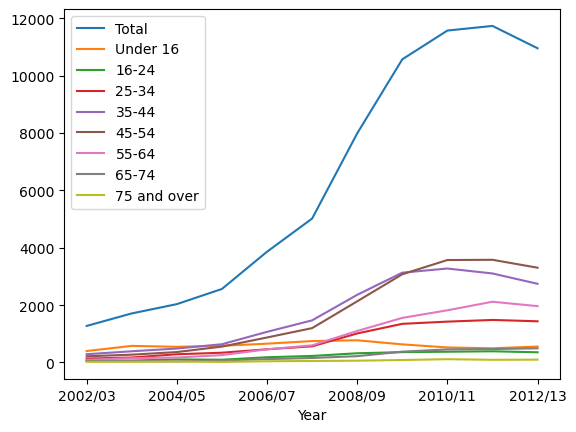

In [29]:
data_age.plot()

In [ ]:
# Menghilangkan data total karena menutupin bidang lain

In [47]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

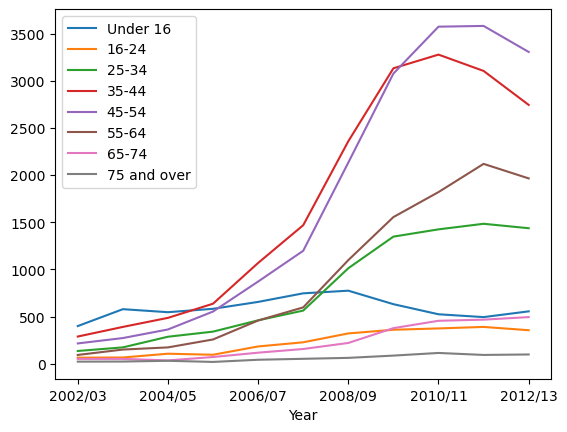

In [48]:
data_age_minus_total.plot()

In [49]:
# anak = under 16
# dewasa = 35-44

<AxesSubplot:xlabel='Year'>

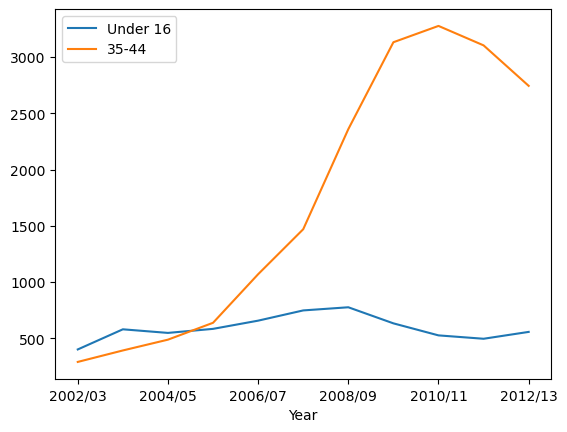

In [40]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

In [ ]:
# Obesitas anak menurun dan orang dewasa meningkat. Kesimpulannya, orang dewasa perlu lebih mengkhawatirkan diri sendiri daripada anak2

# Time Series

## Basic Time Series Manipulation

In [1]:
from datetime import datetime

In [51]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [52]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [60]:
df = pd.DataFrame(date_rng, columns=['datetime'])

In [61]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [62]:
df.head(6)

,datetime,data
0,2020-01-01 00:00:00,76
1,2020-01-01 01:00:00,4
2,2020-01-01 02:00:00,50
3,2020-01-01 03:00:00,16
4,2020-01-01 04:00:00,68
5,2020-01-01 05:00:00,4


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  169 non-null    datetime64[ns]
 1   data      169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [64]:
df.set_index("datetime", inplace=True)

In [66]:
df

,data
datetime,
2020-01-01 00:00:00,76
2020-01-01 01:00:00,4
2020-01-01 02:00:00,50
2020-01-01 03:00:00,16
2020-01-01 04:00:00,68
...,...
2020-01-07 20:00:00,64
2020-01-07 21:00:00,97
2020-01-07 22:00:00,76


In [68]:
str_date_range = [str(x) for x in date_rng]

In [69]:
str_date_range 

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [71]:
pd.to_datetime(str_date_range, infer_datetime_format=True)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [16]:
pd.to_datetime('Wed-March-15-2023 20:04', format='%a-%B-%d-%Y %H:%M')

Timestamp('2023-03-15 20:04:00')

In [79]:
str_date = ['June-01-2022', 'June-02-2022', 'June-03-2022']
date_time_list = [datetime.strptime(d, '%B-%d-%Y') for d in str_date]

In [80]:
date_time_list

[datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2022, 6, 2, 0, 0),
 datetime.datetime(2022, 6, 3, 0, 0)]

In [81]:
pd.DataFrame(date_time_list, columns=['date'])

,date
0,2022-06-01
1,2022-06-02
2,2022-06-03


In [82]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,5
2020-01-02 01:00:00,25
2020-01-02 02:00:00,12
2020-01-02 03:00:00,47
2020-01-02 04:00:00,9
2020-01-02 05:00:00,42
2020-01-02 06:00:00,48
2020-01-02 07:00:00,34
2020-01-02 08:00:00,15


In [84]:
df.loc['2020-01-03']

,data
datetime,
2020-01-03 00:00:00,11
2020-01-03 01:00:00,56
2020-01-03 02:00:00,32
2020-01-03 03:00:00,86
2020-01-03 04:00:00,31
2020-01-03 05:00:00,68
2020-01-03 06:00:00,15
2020-01-03 07:00:00,18
2020-01-03 08:00:00,56


In [86]:
df.loc['2020-01-04': '2020-01-07']

,data
datetime,
2020-01-04 00:00:00,11
2020-01-04 01:00:00,89
2020-01-04 02:00:00,96
2020-01-04 03:00:00,34
2020-01-04 04:00:00,65
...,...
2020-01-07 19:00:00,6
2020-01-07 20:00:00,64
2020-01-07 21:00:00,97


In [87]:
df.resample('D').mean()

,data
datetime,
2020-01-01,55.166667
2020-01-02,42.833333
2020-01-03,48.958333
2020-01-04,44.000000
2020-01-05,46.750000
2020-01-06,41.625000
2020-01-07,54.041667
2020-01-08,79.000000


In [88]:
df['cummalative'] = df.rolling(3).sum()

In [89]:
df['moving_average'] = df['data'].rolling(3).mean()

In [92]:
df['moving_average_filled'] = df['moving_average'].fillna(method='backfill')

In [93]:
df

,data,cummalative,moving_average,moving_average_filled
datetime,,,,
2020-01-01 00:00:00,76,NaN,NaN,43.333333
2020-01-01 01:00:00,4,NaN,NaN,43.333333
2020-01-01 02:00:00,50,130.0,43.333333,43.333333
2020-01-01 03:00:00,16,70.0,23.333333,23.333333
2020-01-01 04:00:00,68,134.0,44.666667,44.666667
...,...,...,...,...
2020-01-07 20:00:00,64,135.0,45.000000,45.000000
2020-01-07 21:00:00,97,167.0,55.666667,55.666667
2020-01-07 22:00:00,76,237.0,79.000000,79.000000


<AxesSubplot:xlabel='datetime'>

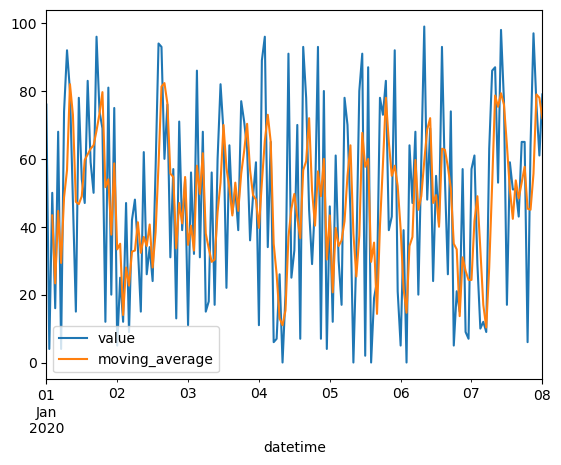

In [95]:
df['data'].plot(label="value", legend=True)
df['moving_average'].plot(label="moving_average", legend=True)

# Time Series on Dataset

In [96]:
data_energy = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0,parse_dates=True)

In [97]:
data_energy

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [98]:
data_energy.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=4383)

In [99]:
data_energy.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=4383)

In [100]:
data_energy['year'] = data_energy.index.year
data_energy['month'] = data_energy.index.month
data_energy['weekday'] = data_energy.index.weekday

In [59]:
data_energy

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [60]:
data_energy.loc['2017-10-03']

Consumption    1176.7697
Wind            459.1350
Solar            79.5530
Wind+Solar      538.6880
year           2017.0000
month            10.0000
weekday           1.0000
Name: 2017-10-03 00:00:00, dtype: float64

In [61]:
data_energy.loc['2017-03-01':'2017-03-31']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


<AxesSubplot:xlabel='Date'>

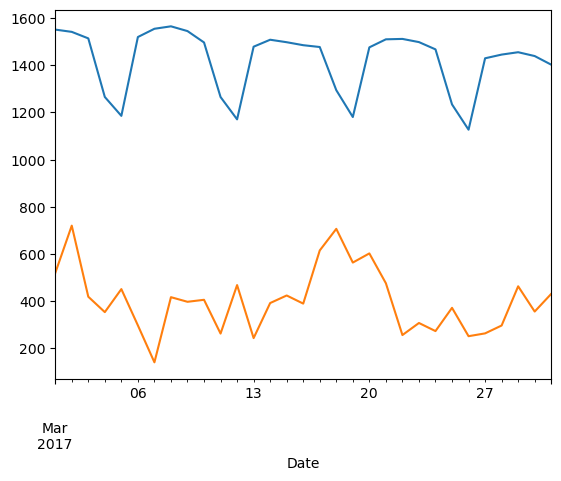

In [65]:
data_energy.loc['2017-03-01':'2017-03-31', 'Consumption'].plot()
data_energy.loc['2017-03-01':'2017-03-31', 'Wind+Solar'].plot()


In [66]:
data_energy.loc['2017-03']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


<AxesSubplot:xlabel='Date'>

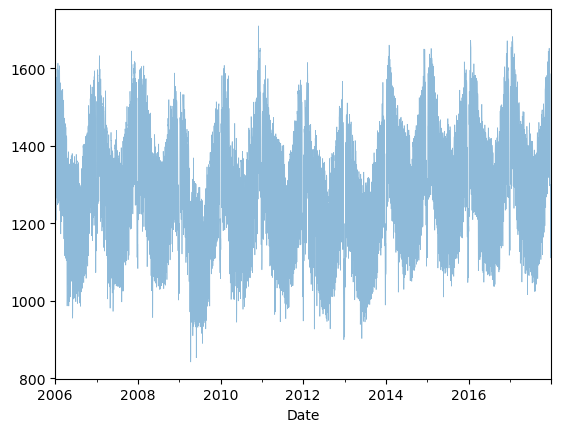

In [68]:
data_energy['Consumption'].plot(linewidth=.5,alpha=.5)

<AxesSubplot:xlabel='Date'>

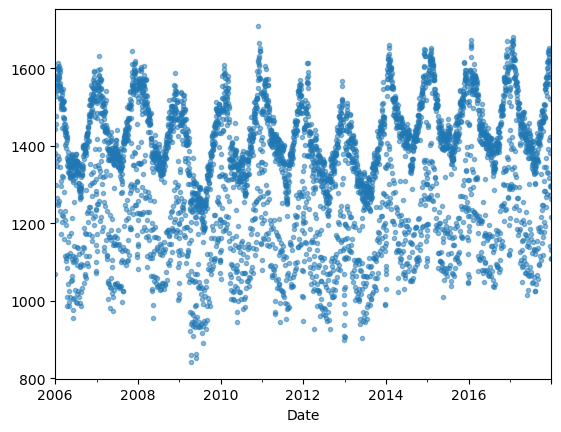

In [70]:
data_energy['Consumption'].plot(marker='.',alpha=.5, linestyle='None')

<AxesSubplot:xlabel='Date'>

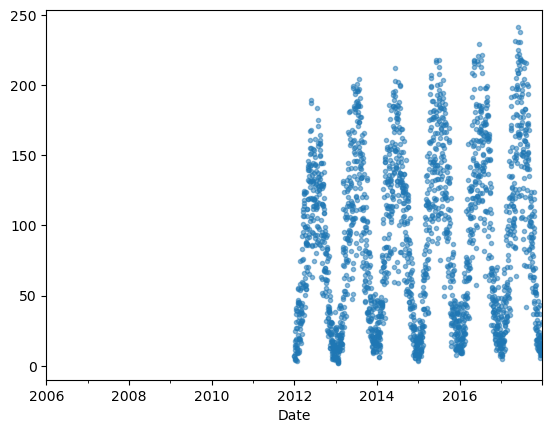

In [71]:
data_energy['Solar'].plot(marker='.',alpha=.5, linestyle='None')

<AxesSubplot:xlabel='Date'>

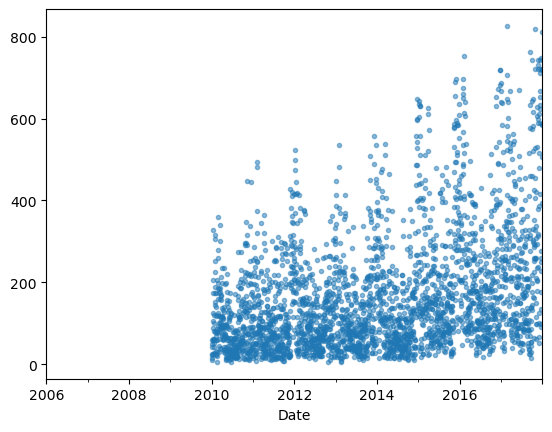

In [72]:
data_energy['Wind'].plot(marker='.',alpha=.5, linestyle='None')

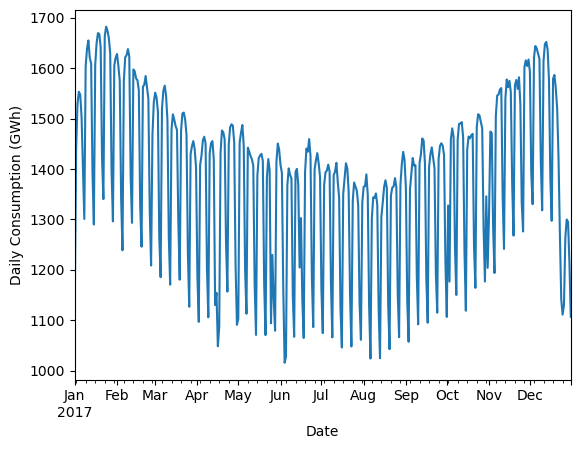

In [74]:
ax = data_energy.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

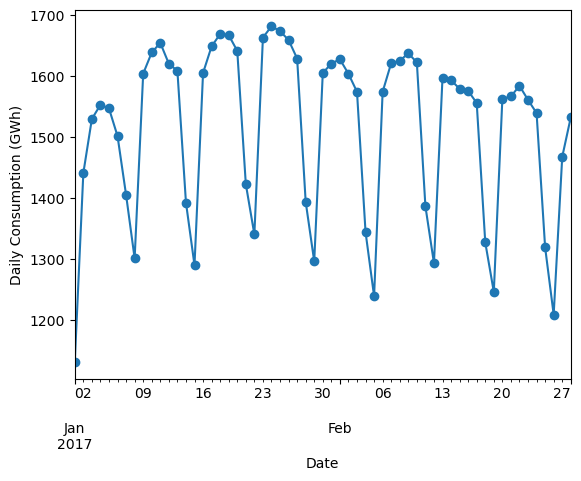

In [76]:
ax = data_energy.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

<AxesSubplot:title={'center':'Consumption'}, xlabel='month'>

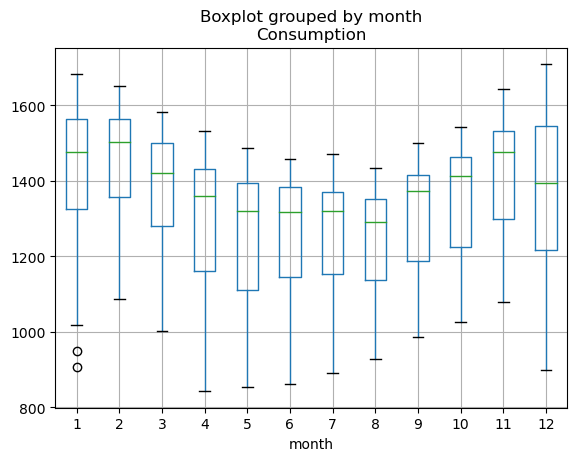

In [79]:
data_energy.boxplot(column=['Consumption'], by='month')

<AxesSubplot:title={'center':'Solar'}, xlabel='month'>

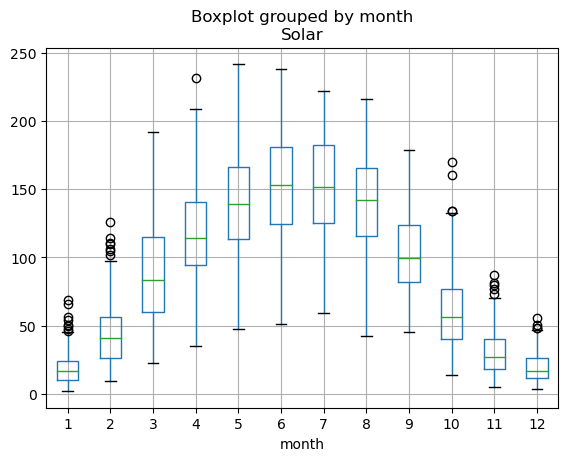

In [80]:
data_energy.boxplot(column=['Solar'], by='month')

<AxesSubplot:title={'center':'Wind'}, xlabel='month'>

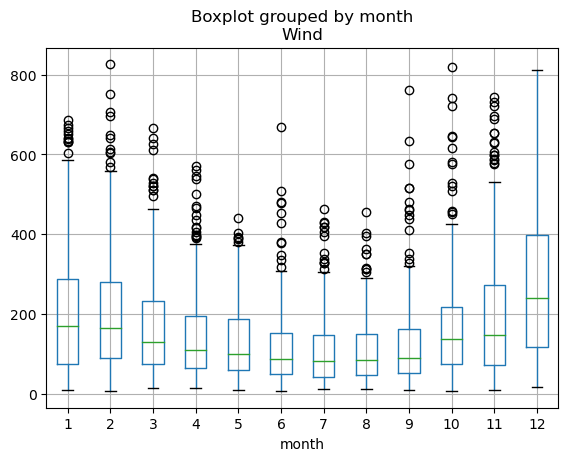

In [81]:
data_energy.boxplot(column=['Wind'], by='month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='weekday'>

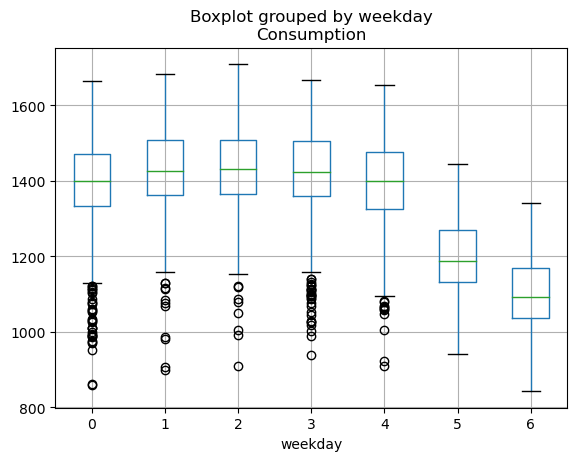

In [82]:
data_energy.boxplot(column=['Consumption'], by='weekday')

<AxesSubplot:title={'center':'Consumption'}, xlabel='year'>

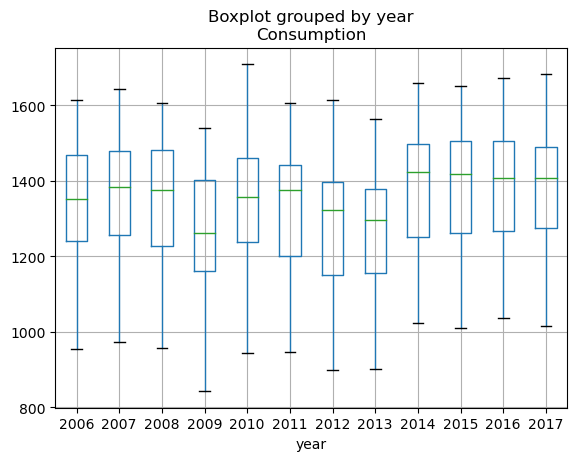

In [83]:
data_energy.boxplot(column=['Consumption'], by='year')

In [107]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
energy_weekly = data_energy[columns].resample('W').mean()

In [108]:
energy_weekly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [109]:
print(energy_weekly.shape[0])

627


<AxesSubplot:xlabel='Date'>

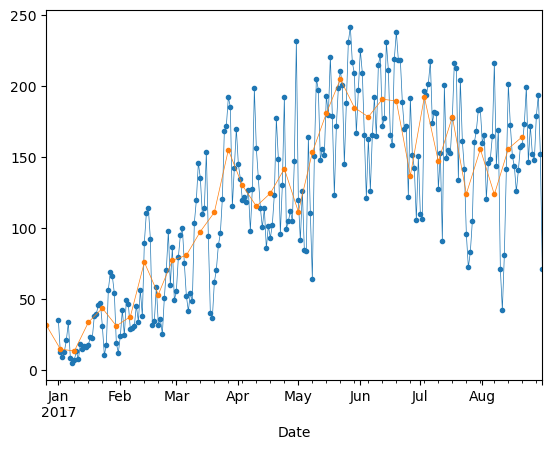

In [110]:
start, end = '2017-01' , '2017-08'
data_energy.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5)
energy_weekly.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5)

In [113]:
data_energy['Consumption_MA7'] = data_energy['Consumption'].rolling(7).mean()

<AxesSubplot:xlabel='Date'>

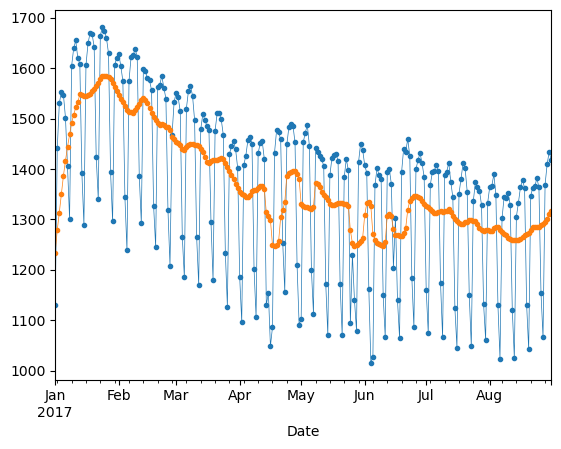

In [115]:
data_energy.loc[start:end, 'Consumption'].plot(marker='.', linestyle='-', linewidth=0.5)
data_energy.loc[start:end, 'Consumption_MA7'].plot(marker='.', linestyle='-', linewidth=0.5)